### Sentiment Analysis of ChatGPT

Name: Sumit Kumar Sangroula 


### Context

The use of computers and its applications have been on the rise since its inception. Several robust AI tools have been developed to solve complex promblems within a matter of seconds and guide the users to achieve their goals. These AI tools works on the basis of user-inputs. Medical Science, Scientific Research and Investigation, Intelligence, Education, Entertainment and Financial Industry, Security and Sports are some of its widely applied fields. With good features come negative impacts as well. People have stopped being critical and rely on the outputs of AI. Although, the aim of application of these tools is to solve complex problems in real world scenario, the over use of these tools have diminished human intelligence and ability to solve the problems. 

One such tool which has overpowered human intelligence is ChatGPT developed by OpenAI. It was first launched in November 2022. It can normally answer all the human queries in a textual form since it adapts Large Language Model and are highly trained using Neural Network algorithms.

As a data scientist, my goal will be to properly analyze the user feedbacks and reviews of the platform, help build a robust system by improving the performance of the tool and implementing user demands, and enhance the overall usability of the platform to attract more users.

For this, I will help build a NLP pipeline to gain higher positive customer feedbacks and ratings by removing the features unwanted by the users, highly focusing on user demands to maximize user experience.

#### Data Source

For this project, we are sourcing the data from https://www.kaggle.com/datasets/charunisa/chatgpt-sentiment-analysis?select=file.csv

* Dataset name: ChatGPT sentiment analysis
* Format: CSV
* No. of Columns: 3
* No. of Records: 219294

### Importing necessary libraries

In [60]:
import pandas as pd #for data manipulation and analysis
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization
import string #for character manipulation
import nltk #natural language tool kit for sentence and word processing
from nltk.tokenize import word_tokenize #to tokenize the words from the text
from collections import Counter #to count the words
from nltk.corpus import opinion_lexicon, stopwords #to check expressive words in the dataset
from sklearn.model_selection import train_test_split #to train, test and split the data
from sklearn.feature_extraction.text import TfidfVectorizer #to evaluate word relevance in the data
import numpy as npy #for number processing
from imblearn.over_sampling import SMOTE #to balance the imbalance dataset
from sklearn.tree import DecisionTreeClassifier #supervised learning model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #supervised learning model
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score #evaluation metrics
from sklearn.model_selection import RandomizedSearchCV #to tune the hyperparameters
from sklearn.model_selection import StratifiedKFold #to implement Cross Validation
from sklearn.linear_model import LogisticRegression #supervised learning model
from sklearn.model_selection import GridSearchCV  #to tune the hyperparameters
import warnings #to ignore the warnings 
warnings.filterwarnings('ignore')


##### Importing the data from our local source which was downloaded from Kaggle.

In [2]:
file_src = "C:/Users/Acer/Desktop/dataset for big data analytics/file.csv" #source of the data
dtf = pd.read_csv(file_src ) #Reading the data from the source

### Data Exploration

In [3]:
dtf.head(5) #Displaying the first 5 rows

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


Our focus will be on the tweets and the reviews provided by the users to make sentiment analysis of ChatGPT. The 'tweets' column includes users' opinions while the 'labels' column indicate the user experiences of how they perceive ChatGPT. Both these columns are object types.

#### Checking for Null values

In [56]:
dtf.isnull().value_counts()

tweets  labels  tokd_tweets
False   False   False          219294
Name: count, dtype: int64

Out of the 219294 entries, there is no presence of null values in the dataset.

#### Checking for NaN values

In [5]:
dtf.isna().sum() #The isna function checks whether the dataset contain any NaN values.

Unnamed: 0    0
tweets        0
labels        0
dtype: int64

There aren't any NaN values in the dataset.

#### Checking for duplicated items

In [6]:
dtf.duplicated().value_counts() #The duplicated function checks for duplicated items in the dataset. The value_counts function returns the no. of duplicated items.

False    219294
Name: count, dtype: int64

There are no duplicated values in our dataset.

### Explanatory Data Exploration

Since the index column doesn't provide any relative information for sentiment analysis, we will remove the unnamed index column.

In [7]:
dtf = dtf.drop(columns = ['Unnamed: 0'], axis =1) #Dropping the unnamed index column
dtf.head(5)

,tweets,labels
0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad


#### Calculating total no. of entries for each label.

In [8]:
labels_cts = dtf['labels'].value_counts() #value.counts() function counts the values for each feature in the labels column
labels_cts

labels
bad        107796
good        56011
neutral     55487
Name: count, dtype: int64

The output above shows that around 50% of the users have had bad experience from ChatGPT or doesn't support the use of ChatGPT. The values for good and neutral labels are close to each other making around 25% each of the total counts. From this, we can cleary say that the dataset is an imbalanced dataset.

### Data Pre-processing

##### Changing categorical datatype into numerical datatype

In [9]:
#Changing the values of labels using replace function
dtf['labels'] = dtf['labels'].replace({'good': 2, 'neutral':1, 'bad': 0})
dtf.head(5)

,tweets,labels
0,ChatGPT: Optimizing Language Models for Dialog...,1
1,"Try talking with ChatGPT, our new AI system wh...",2
2,ChatGPT: Optimizing Language Models for Dialog...,1
3,"THRILLED to share that ChatGPT, our new model ...",2
4,"As of 2 minutes ago, @OpenAI released their ne...",0


##### Lowercasing the characters of tweets column for better analysis

In [10]:
#Lowercasing the characters using lambda and str.lower() function
dtf = dtf.apply(lambda txt: txt.str.lower() if txt.dtypes == 'object' else txt)
dtf.head(5)


,tweets,labels
0,chatgpt: optimizing language models for dialog...,1
1,"try talking with chatgpt, our new ai system wh...",2
2,chatgpt: optimizing language models for dialog...,1
3,"thrilled to share that chatgpt, our new model ...",2
4,"as of 2 minutes ago, @openai released their ne...",0


##### Removing the punctuation and symbols from the text

In [11]:
#Removing punctuations and symbols from the 
dtf['tweets'] = dtf['tweets'].str.translate(str.maketrans('', '', string.punctuation))
dtf.head(5)

,tweets,labels
0,chatgpt optimizing language models for dialogu...,1
1,try talking with chatgpt our new ai system whi...,2
2,chatgpt optimizing language models for dialogu...,1
3,thrilled to share that chatgpt our new model o...,2
4,as of 2 minutes ago openai released their new ...,0


##### Tokenizing the words from the tweets column

In [12]:
#Tokenizing the text from tweets column using word_tokenize function
dtf['tokd_tweets'] = dtf['tweets'].apply(word_tokenize) #Using word_tokenize function to tokenize the tweets column and store the tokenized tweets in a new column

#Displaying the tokenized words of the first row
print(f"Tweet {0}:")
print("Original tweet:", dtf['tweets'].iloc[0]) #iloc[0] refers to the first row
print("After tokenization:  ", dtf['tokd_tweets'].iloc[0])

Tweet 0:
Original tweet: chatgpt optimizing language models for dialogue httpstcok9rkrygyyn openai
After tokenization:   ['chatgpt', 'optimizing', 'language', 'models', 'for', 'dialogue', 'httpstcok9rkrygyyn', 'openai']


In [13]:
dtf.head(3) #displays the head after tokenization

,tweets,labels,tokd_tweets
0,chatgpt optimizing language models for dialogu...,1,"[chatgpt, optimizing, language, models, for, d..."
1,try talking with chatgpt our new ai system whi...,2,"[try, talking, with, chatgpt, our, new, ai, sy..."
2,chatgpt optimizing language models for dialogu...,1,"[chatgpt, optimizing, language, models, for, d..."


In [14]:
dtf['tokd_tweets'] = dtf['tokd_tweets'].apply(lambda tokens: ' '.join(tokens)) #Joining the tokens for better display
dtf.head(3)

,tweets,labels,tokd_tweets
0,chatgpt optimizing language models for dialogu...,1,chatgpt optimizing language models for dialogu...
1,try talking with chatgpt our new ai system whi...,2,try talking with chatgpt our new ai system whi...
2,chatgpt optimizing language models for dialogu...,1,chatgpt optimizing language models for dialogu...


##### Finding the most frquently used words in the tweets

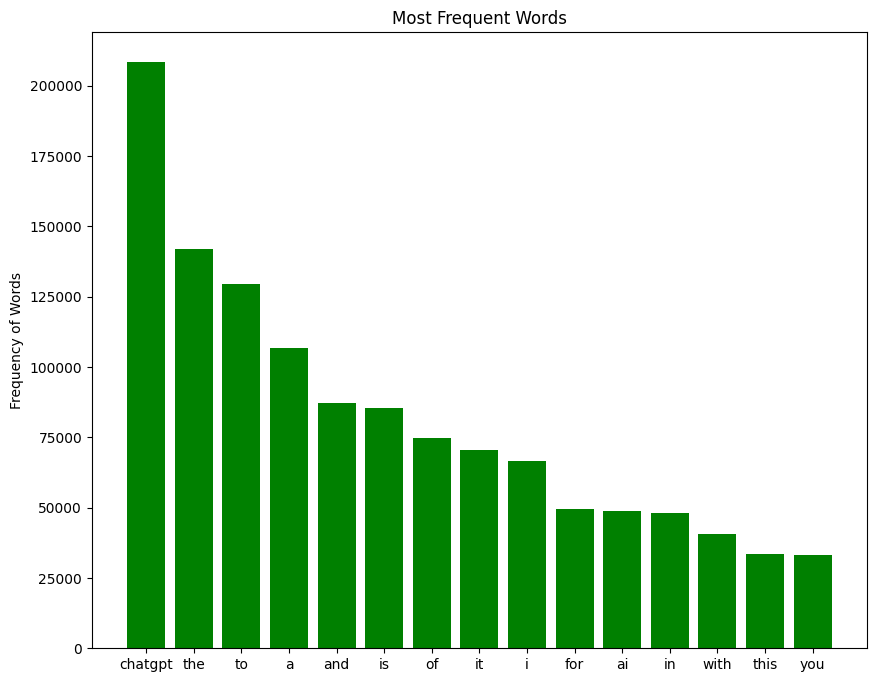

In [66]:
#joining and splitting the tweets after lowercasing and removing the punctuations
words = ' '.join(dtf['tokd_tweets']).split()

#Counting the frequency of each word using Counter method
freq_words = Counter(words)

#Retrieving the 15 most common words
most_repeated_words = freq_words.most_common(15) 

#Plotting the most frequent words in a barplot
words, freqs = zip(*most_repeated_words)
plt.figure(figsize=(10,8))
plt.bar(words, freqs, color='green')
plt.title("Most Frequent Words")
plt.ylabel("Frequency of Words")
plt.show()

The most frequently used word in the tweets feature is the word 'chatgpt' followed by the article 'the'. Although, the overall counts of labels 'bad' was much higher, the words that denote negative expression doesn't make it in the top 15 repeated words. Infact the top 15 words don't even include an adjective that would describe ChatGPT(except the word chatgpt) nor does it contain any expressive words.

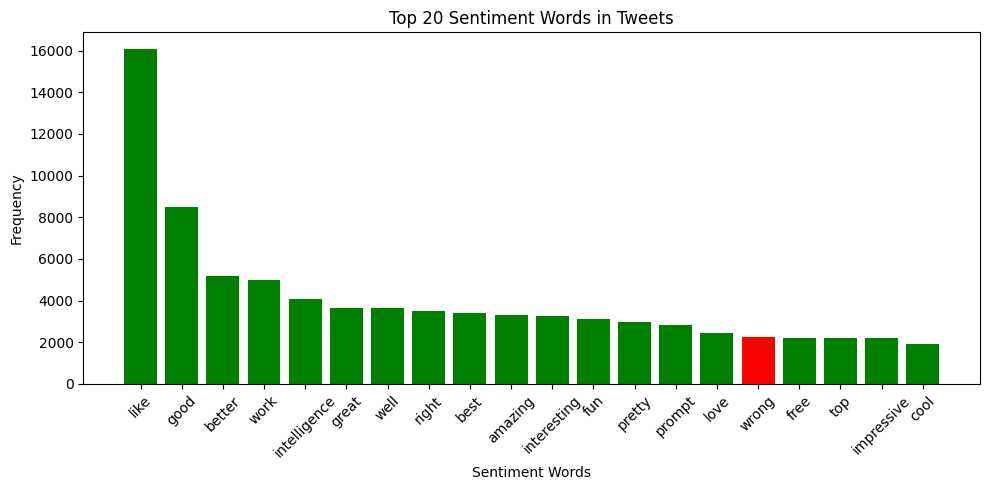

In [68]:
#Retrieving the lexicons for positive and negative words
pst_words = set(opinion_lexicon.positive())
neg_words = set(opinion_lexicon.negative())

#Combining both to get the sentiment
sentiment_words = pst_words.union(neg_words) #Using union function to combine positive and negative words

#Filtering sentiment words
all_sentiment_words = []
stop_words = set(stopwords.words('english'))

for tweet in dtf['tokd_tweets']:
    tokens = word_tokenize(tweet.lower())
    filtered = [word for word in tokens if word.isalpha() and word not in stop_words and word in sentiment_words]
    all_sentiment_words.extend(filtered)

#Counting the top 20 words with sentiments
word_counts = Counter(all_sentiment_words).most_common(20)

#Assigning colour for positive and negative words
colors = ['green' if word in positive_words else 'red' for word, _ in word_counts] #if it is a positve word - Green, if negative - Red

#Plotting the graph
words, freqs = zip(*word_counts)
plt.figure(figsize=(10, 5))
plt.bar(words, freqs, color=colors)
plt.title("Top 20 Sentiment Words in Tweets")
plt.xlabel("Sentiment Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the graph above, it is observed that positive sentiment words appeared more in the tweets with only one negative sentiment word 'wrong' making it to the top 20.

##### Defining features and labels

In [16]:
X = dtf['tokd_tweets'] 
y= dtf['labels']

##### Splitting the data into train and test datasets

In [17]:
#Splitting the data into train and test datasets. 80% of the data will be trained and the remaining 20% data will be assigned for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify =y) #stratify = y, to maintain label distribution, since we have an imbalance dataset

### Feature Engineering

##### Choosing a Vectorizer

Although, TF-IDF itself doesn't handle imbalance datasets, it evaluates the importance of word to a document in relevance to the whole corpus. It addresses feature extraction by converting text into numeric features without addressing class distribution. It minimizes the influence of stopwords and gives more importance to the terms that are informative.

In [18]:
vect = TfidfVectorizer(max_features = 3000) #Since the output matrix will be huge and to avoid system crashing we will just take 3000 frequent tokens
X_train_vect = vect.fit_transform(X_train) #fits and transforms X_train
X_test_vect = vect.transform(X_test) #only transforms X_test

In [19]:
#Printing the shapes
print(f' The shape of X is: ', X_train_vect.shape)
print(f' The shape of X is: ', X_test_vect.shape)

 The shape of X is:  (175435, 3000)
 The shape of X is:  (43859, 3000)


Since our dataset is imbalanced, we will use SMOTE to oversample the training datasets which will produce synthetic samples from the minority classes i.e. 'good' and 'neutral'.

##### Oversampling the data using SMOTE

In [20]:
#Assigning variable for SMOTE function 
smote1 = SMOTE(random_state=42)
new_X_train, new_y_train = smote1.fit_resample(X_train_vect, y_train) #Resampling the train and test datasets

### Training the Models

In [21]:
#Creating a dictionary of models
mods = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

rslts = [] #to store result for each model

for model_name, model in mods.items():
    #Training the models on resampled training data
    model.fit(new_X_train, new_y_train)
    
    #Making Predictions
    y_pred = model.predict(X_test_vect) #since the models expect numerical feature vectors, we have provided X_test_vect instead of X_test for predictions
    
    #Calculating the metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    #Appending the result metrics
    rslts.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

#Creating a new dataframe that displays the results
results_df = pd.DataFrame(rslts)

#Printing the results
print(f'The evaluation metrics for the models:')
print(results_df)


The evaluation metrics for the models:
               Model  Accuracy  Precision    Recall  F1-Score
0      Decision Tree  0.703322   0.707989  0.703322  0.705356
1      Random Forest  0.734239   0.727479  0.734239  0.728247
2  Gradient Boosting  0.665929   0.662427  0.665929  0.660830


For this particular imbalanced dataset, we will emphasize more on F1 score because it balances both Precision and Recall.
* Accuracy - It is generally used when the dataset is a balanced one. It is based upon the total correct predictions of all the predictions it makes.
* Precision - It checks how many positive predictions are actually correct. It minimizes the False Positive predictions. eg. spam detection in emails, fraud detection in banking transactions
* Recall - Missing a true positive could be costly. So, unlike Precision, it compares with actual positive values that are correctly identified by the model. eg. search engine, medical diagnosis.
* F1 - It is the harmonic mean of Precision and Recall. It gives a balanced value when considering both False Positives and False Negatives

The output above shows that Random Forest Classifier yielded the highest F1-Score of 0.728 followed by Decision Tree Classifier 0.705 and Gradient Boosting with the lowest F1-Score of 0.660. We will check whether fine tuning the hyperparameters of Random Forest Classifer yield better results.

#### Fine-Tuning the Hyper-parameters

We will use RandomizedSearchCV to tune the hyperparameters of Random Forest Classifier to achieve better result. Although GridSearchCV may produce better results than RandomizedSearchCV, considering a huge parameter grid, fast processing and achieving a better result if not the best; RandomizedSearchCV does it better.

Setting n_estimators to 10, min_samples_split to 3 and without defining cross validation, we got F1-Score of 0.694 which was lesser than the previous output of 0.72, so we will increase the no. of variables for these parameters and also add iterations to check whether the F1-Score increases or not. However, the biggest drawback of using these parameters is time. Training RandomForestClassifier with these parameters takes a lot of time to process. 

In [38]:
#Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'class_weight': ['balanced'],  #class weight for imbalanced classes
    'max_depth': [None, 10],
    'min_samples_split': [3, 5]
}

#Selecting Random Forest Classifier model
rfc = RandomForestClassifier(random_state=42, warm_start=True) #choosing Random Forest Classifier model as our estimator

#Assigning StratifiedKFold for cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  #cross-validation using SratifiedKFold is better for imbalance dataset

#Initializing the model
rfc_random_search = RandomizedSearchCV(
    estimator=rfc, 
    param_distributions=param_grid,
    n_iter=20,  #No. of iterations
    cv = cv,
    verbose=2,
    random_state=42,
    n_jobs=-1, # to use all the CPU cores for parallel processing
    scoring='f1_weighted' #to choose best parameters based on F1 score
)

#Fitting the model on the training data
rfc_random_search.fit(new_X_train, new_y_train)

#Printing best hyperparameters
print("Best Hyperparameters:\n", rfc_random_search.best_params_)

#Evaluating the best model on test data
best_rf = rfc_random_search.best_estimator_
y_pred_best = best_rf.predict(X_test_vect)

#Calculating and printing the weighted F1-score
f1_s = f1_score(y_test, y_pred_best, average='weighted')
print(f"The Weighted F1-Score after tuning Random Forest: {f1_s:.4f}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters:
 {'n_estimators': 100, 'min_samples_split': 3, 'max_depth': None, 'class_weight': 'balanced'}
The Weighted F1-Score after tuning Random Forest: 0.7295


From the output above, we can see that the weighted F1-Score didn't increase much and we can't consider it the optimal score. The best hyperparameters are :
* n_estimators: 100
* min_samples_split: 3
* max_depth: None
* class_weight: balanced

Since, we couldn't get a better F1-Score, let us train the datasets using a much simpler model. i.e Logistic Regression, and check whether it gets a better output.

##### Checking if Logistic Regression performs better

Although Logistic Regression is the simplest among all these models in terms of complexity level and performance on imbalanced dataset, let us apply this model and see if we can get a better score.

In [44]:
#Initializing Logistic Regression model
logr_model = LogisticRegression(random_state=42, max_iter=1000)

#Training on resampled data
logr_model.fit(new_X_train, new_y_train)

#Making Predictions
y_pred1 = log_reg.predict(X_test_vect)

#Calculating F-1 Score
f1score = f1_score(y_test, y_pred, average='weighted')

print(f'The Weighted F1 Score for Logistic Regression is: {f1score:.4f}')

The Weighted F1 Score for Logistic Regression is: 0.7897


Since, the Logistic Regression yeilded better score of 0.78 than the previous models, we will fine tune it and check whether the scoer improves or not.

In [54]:
#Defining parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],            #to find optimum strength for Inverse of Regularization strength
    'solver':['saga', 'lbfgs', 'newton-cg'],           #to handle large, sparse data.
    'penalty':['l2'],            #Applying Ridge Regularization to reduce coefficients
    'class_weight':['balanced'],  #helps with class imbalance
    'multi_class':['multinomial'], #to handle multiclass i.e. 0, 1 and 2 class labels
    'max_iter':[1000, 2000], #making iterations
    'random_state':[42]          
}

#Initializing Logistic Regression model
logr_model1 = LogisticRegression(random_state=42)

#Choosing GridSearchCV for fine tuning
grid_search = GridSearchCV(logr_model1, param_grid, scoring='f1_weighted', cv=3, n_jobs=-1)

#Fitting the train data
grid_search.fit(new_X_train, new_y_train)

#Finding the best estimator
best_estr = grid_search.best_estimator_

#Making predictions
y_pred2 = best_estr.predict(X_test_vect)

#Calculating the weighted F1 score
f1score1 = f1_score(y_test, y_pred2, average='weighted')

#Printing the results
print(f'The best hyperparameters for fine tuning are: {grid_search.best_params_}')
print(f'Logistic Regression Weighted F1 Score after fine tuning: {f1score1:.4f}')


The best hyperparameters for fine tuning are: {'C': 100, 'class_weight': 'balanced', 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'random_state': 42, 'solver': 'saga'}
Logistic Regression Weighted F1 Score after fine tuning: 0.8014


Surprisingly, after fine-tuning the hyperparameters, the F1-Score increased to 0.80. This means that for this particular sentiment analysis, Logistic Regression outperforms all other complex models

### Conclusion

Although the most simplest models among the 4, it is observed that Logistic Regression outperformed all the other models after oversampling the vectorized dataset as it handled the sparse data conveniently. Undersampling the data could have given the result in favour of other complex models as they underperfom on noisy datasets whereas Logistic Regression handles overfitting of the data due to its tolerance to sparse features.

A key takeaway from the output of these models is "a simple model can out-perform complex models if the hyper-parameters are fine tuned properly".

Regarding the dataset, the data imbalance may have occur due to presence of 'bogus' or 'fabricated' tweets from the users. The labels and the tweets may have been randomly posted to boost the negative performance of ChatGPT. In future, only genuine reviews must be included in the dataset to build a robust NLP pipeline.

In consideration to genuine negative feedbacks, the company must take into accounts of these reviews and apply necessary changes to the platform to improve user experience and satisfaction. The company must also develop a NLP pipeline to detect the feedbacks based on sentiments and automatically label them to create a balanced dataset for further analysis and making improvements.